In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings

In [231]:
warnings.filterwarnings('ignore')

# Definición del problema

Crear un modelo de regresión con el objetivo de predecir la nota de exámen de los estudiantes

In [232]:
df=pd.read_csv("C:\\Users\\amado\\Desktop\\Ciencias de datos\\Bases de datos\\test_scores.csv")

# Análisis exploratorio

In [224]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_type      2133 non-null   object 
 1   teaching_method  2133 non-null   object 
 2   pretest          2133 non-null   float64
 3   posttest         2133 non-null   float64
dtypes: float64(2), object(2)
memory usage: 66.8+ KB


### Selección de variables

Seleccionaremos la variable que hace alusión al método de estudio así como el tipo de escuela si es pública o no y por su puesto la notá del exámen preeliminar asi como el final que va con un valor máximo de 100.

Seleccionamos dichas variables con el objetivo de generalizar para poder aplicar en diferentes escuelas.

In [243]:
df=df[['school_type','teaching_method','pretest','posttest']]

In [226]:
df.describe()

,pretest,posttest
count,2133.000000,2133.000000
mean,54.955931,67.102203
std,13.563101,13.986789
min,22.000000,32.000000
25%,44.000000,56.000000
50%,56.000000,68.000000
75%,65.000000,77.000000
max,93.000000,100.000000


In [167]:
df.teaching_method.value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

In [227]:
sns.set_style(style='whitegrid')

In [228]:
sizes=[1373,760]
labels=['Standard','Experimental']

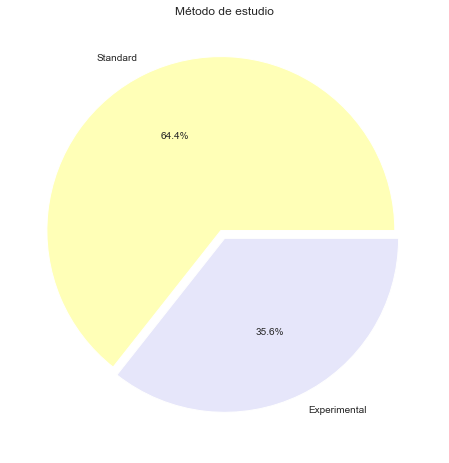

In [229]:
colors=['#ffffb7','#e6e6fa']

plt.figure(figsize=(20,8))

plt.title('Método de estudio')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',colors=colors,explode=[0.05,0])
plt.show()

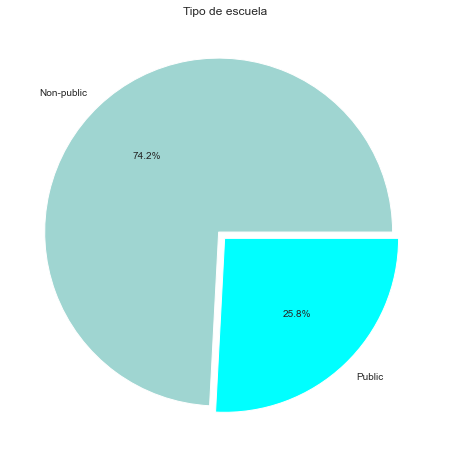

In [186]:
plt.figure(figsize=(20,8))


plt.title('Tipo de escuela')
plt.pie(df.school_type.value_counts(),labels=df.school_type.unique(),
        autopct='%1.1f%%',colors=['#9FD5D1','#00ffff'],explode=[0.05,0])

plt.show()

In [189]:
def hist_boxplot(y):
    

    fig,(ax_hist,ax_box)=plt.subplots(1,2,figsize=(20,8))

    ax_hist.hist(df[y],ec='black',lw=3,color='#ffffbf')

    ax_hist.set_title('Exámen')

    ax_hist.axvline(df[y].mean(),lw=4,linestyle='-',c='blue',label='Promedio')
    ax_hist.axvline(df[y].median(),lw=4,linestyle='-',c='red',label='Mediana')
    ax_hist.axvline(df[y].mode()[0],lw=4,linestyle='-',c='c',label='Moda')


    ax_box.set_title('Exámen')
    sns.boxplot(df[y],color='#ffffbf')

    ax_hist.legend()

    plt.show()


#### Moda

Es el valor que más se repite.


#### Promedio 

Es la suma de los números divida por la cantidad de las observaciones con el objetivo de generalizar yque represente la muestra de los datos.


#### Mediana

Es el valor que está justamente en el medio cuando los datos están ordenamos de menor a mayor.

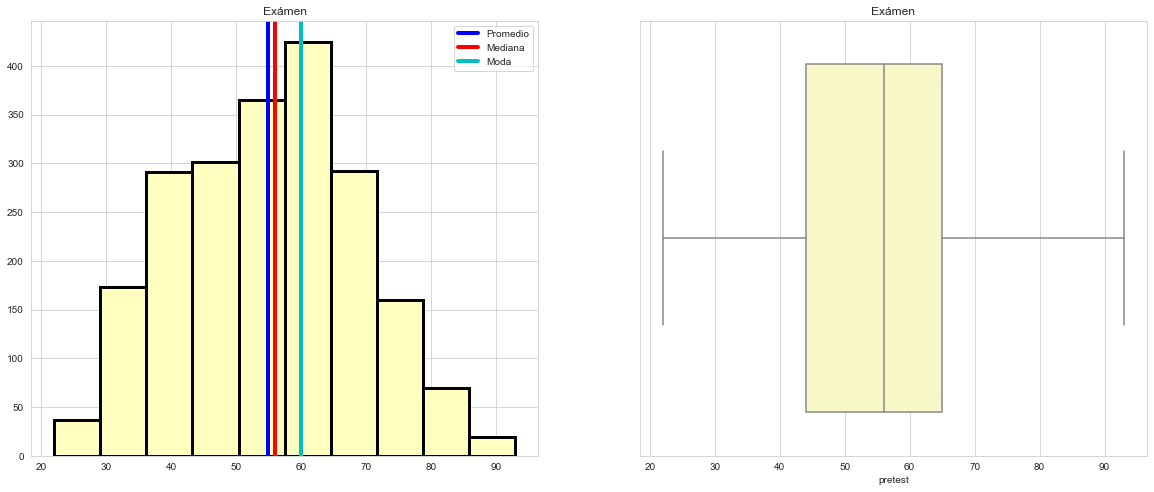

In [193]:
hist_boxplot('pretest')

Observamos que hay una concentración a la derecha y la moda está algo alejada a las dos medidas de tendencia central.

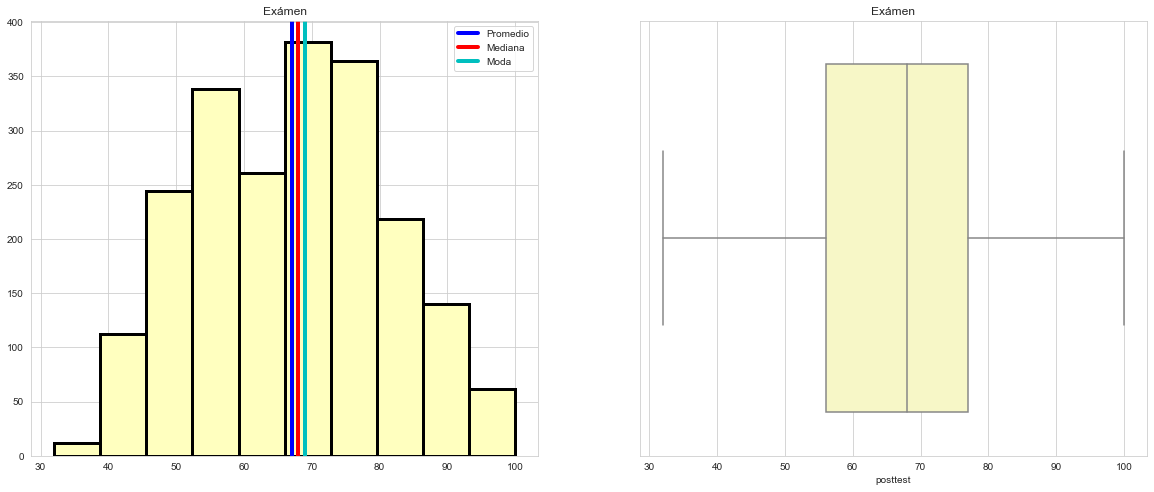

In [194]:
hist_boxplot('posttest')

Sucedo lo contrario para dicha variable donde ambas medidas están casi juntas, pero aún hay más concentración hacía la derecha.

## ¿El método de estudio y el tipo de escuela influyen al resultado ?

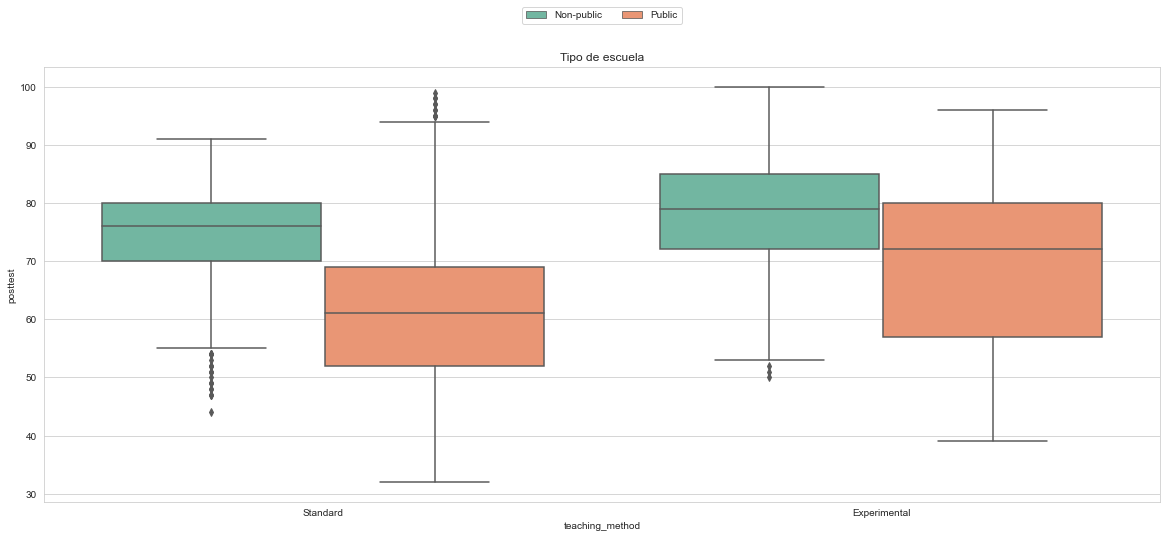

In [237]:
fig,(ax_box)=plt.subplots(1,1,figsize=(20,8))

ax_box.set_title('Tipo de escuela')
sns.boxplot(x='teaching_method',y='posttest',hue='school_type',data=df,palette='Set2',ax=ax_box)
ax_box.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=2)
plt.show()

Observamos que los alumnos que estudiaron en una escuela que tuvieron un método de enseñanza convencional tienen una nota superior a los que estudiaron en escuela privada.

Pero los que estudiar en dicha escuela si usan un método de estudio personalizado tienden a tener una calificación más alta que los que estudiaron en escuela pública.


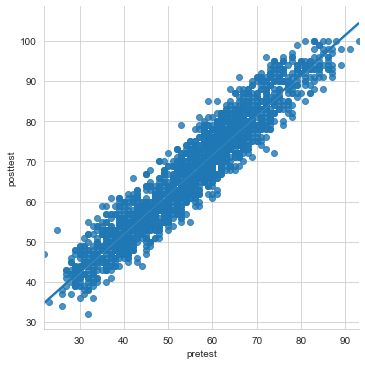

In [238]:

sns.lmplot(x='pretest',y='posttest',data=df)
plt.show()

Podemos observar que si hay una relación significativa entre ambas variables.

### Eliminación de valores atípicos.

In [251]:
df=df[df['pretest']>=32]

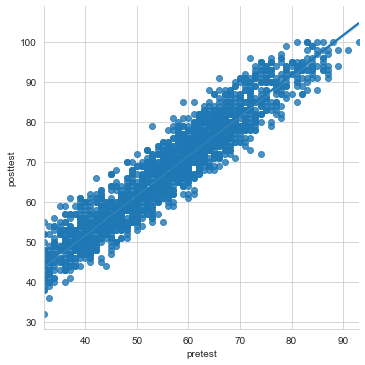

In [253]:

sns.lmplot(x='pretest',y='posttest',data=df)
plt.show()

#### Transformamos las varibales tipo texto

In [254]:
df.school_type=np.where(df['school_type']=='Non-public',0,1)
df.teaching_method=np.where(df['teaching_method']=='Standard',0,1)

In [255]:
df

,school_type,teaching_method,pretest,posttest
0,0,0,62.0,72.0
1,0,0,66.0,79.0
2,0,0,64.0,76.0
3,0,0,61.0,77.0
4,0,0,64.0,76.0
...,...,...,...,...
2128,1,0,39.0,55.0
2129,1,0,38.0,46.0
2130,1,0,45.0,51.0
2131,1,0,46.0,53.0


<AxesSubplot:title={'center':'Correlation Matrix'}>

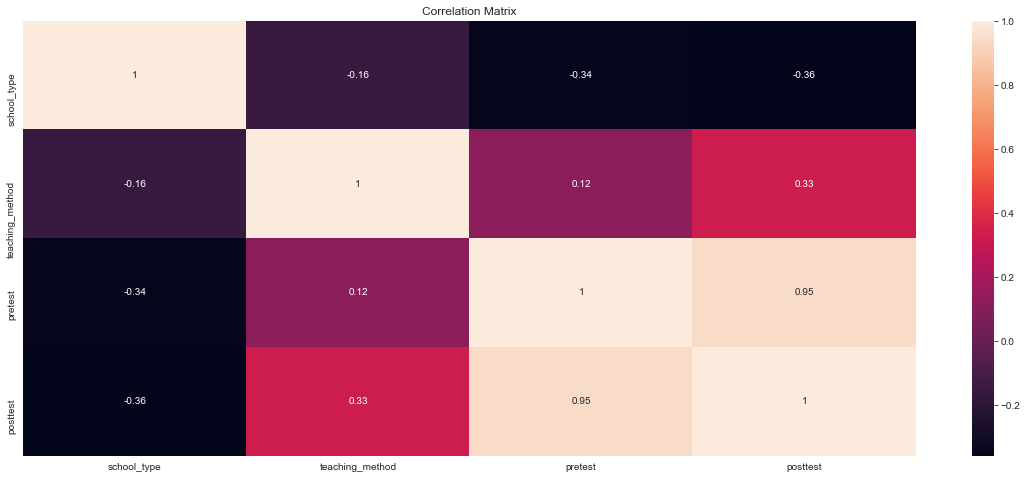

In [256]:
plt.subplots(1,1,figsize=(20,8))

plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

### Preprocesamiento de datos

Hacemos un rescalado de los datos para que esten un el rango de 0 a 1 con el fin de no manejar datos tan grandes pero tampoco tan chicos.

In [257]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df['pretest']=scaler.fit_transform(df[['pretest']])


### División de datos de entrenamiento y validación

In [258]:

X=df.drop(['posttest'],axis='columns')
y=df['posttest']


from sklearn.model_selection import train_test_split,cross_val_score


X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               y,
                                               random_state=0,
                                               test_size=0.2)

X_train.shape,X_test.shape

((1640, 3), (410, 3))

# Creación del modelo

In [265]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,Y_train)

lm.score(X_train,Y_train)

0.9417704181702031

In [266]:
pred=lm.predict(X_test)

### Métricas de desempeño

In [267]:
from sklearn.metrics import mean_squared_error,r2_score


print(f'MSE {mean_squared_error(Y_test,pred)}')


print(f'R2  {r2_score(Y_test,pred)}')

MSE 11.916434993617795
R2  0.9371813550028335


In [268]:
cross_val_score(lm,X_test,Y_test,cv=10).mean()

0.9304940121005547

El promedio de generalización es de un 93% lo cual indica que nuestro modelo será muy útil a la hora de predecir nuevos datos

In [269]:
n_obs=np.arange(0,len(Y_test))

def main():
    
    
    plt.scatter(n_obs,Y_test,marker='+',c='c',label='Valores Predichos')
    plt.scatter(n_obs,pred,c='k',marker='*',label='Valores originales')
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=2)



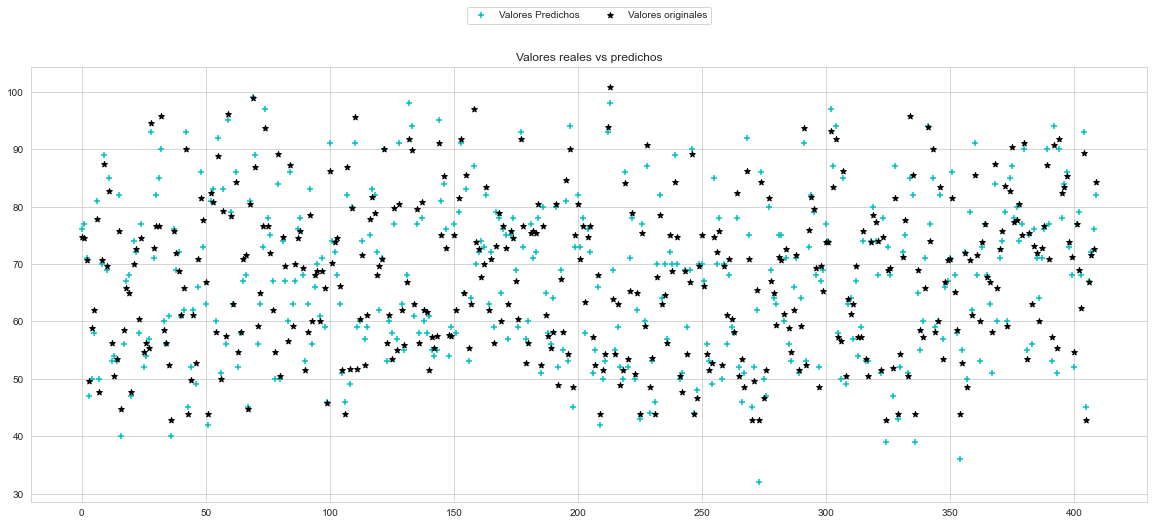

In [271]:
if __name__ =='__main__':
    
    plt.figure(figsize=(20,8))
    plt.title('Valores reales vs predichos')
    
    main()

Apreciamos que los valores predichos no son muy lejanos a los originales como ya anticipaba el R2 que esel porcentaje de variación entre los datos reales y las predicciones.

### Comparamos los datos reales vs las predicciones

In [272]:
df_compare=pd.DataFrame({'Valores reales': Y_test,'Predicciones':pred})

In [274]:
df_compare.head(50)

,Valores reales,Predicciones
1348,76.0,74.733310
1419,77.0,74.472681
1207,71.0,70.643520
1074,47.0,49.583133
950,50.0,58.754990
1807,58.0,62.027907
465,81.0,77.900796
770,50.0,47.668553
1383,70.0,70.643520
1640,89.0,87.473699


### Guardamos el modelo

In [275]:
import joblib


joblib.dump(lm,'lm_estudaintes.pkl')


['lm_estudaintes.pkl']